## Visualization for evaluation task

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
schema_2 = {
    "Macro F1 score weight distribution": ["Macro F1 score of equal weight", "Heavier weight on stability", "Heavier weight on cell structure", "Heavier weight on numeric data", "Normalized PCE difference prediction", "Stability Prediction"],
    "Base Deepseek 8bit": [0.612638, 0.559509, 0.599405, 0.638013, 0.720972, 0.585684],
    "Fine-Tuned Deepseek 8bit": [0.565637, 0.568550, 0.535919, 0.638013, 0.620636, 0.560775],
    "Llama 8bit": [0.398195, 0.411994, 0.344256, 0.432364, 0.481657, 0.400583],
}

schema_1 = {
    "Macro F1 score weight distribution": ["Macro F1 score of equal weight", "Heavier weight on stability", "Heavier weight on cell structure", "Heavier weight on numeric data", "Prediction 1", "Normalized PCE difference prediction", "Stability Prediction"],
    "Base Deepseek 8bit": [0.478965, 0.431204, 0.490628, 0.489202, 0.657539, 0.640238, 0.411219],
    "Fine-Tuned Deepseek 4bit": [0.529807, 0.478216, 0.540545, 0.542935, 0.674124, 0.699868, 0.441058],
    "Fine-Tuned Deepseek 8bit": [0.590996, 0.563622, 0.593914, 0.592720, 0.655673, 0.679721, 0.537293],
    "Llama 3 billion parameter": [0.582662, 0.546909, 0.591821, 0.580230, 0.651199, 0.682697, 0.507860],
}
schema_1df = pd.DataFrame(schema_1)
schema_1df = schema_1df.drop(4)
schema_1df = schema_1df[["Macro F1 score weight distribution","Base Deepseek 8bit", "Fine-Tuned Deepseek 8bit", "Llama 3 billion parameter"]]
schema_1df.columns = ["Macro F1 score weight distribution","Base Deepseek 8bit", "Fine-Tuned Deepseek 8bit", "Llama 3 billion parameter"]
schema_1df

,Macro F1 score weight distribution,Base Deepseek 8bit,Fine-Tuned Deepseek 8bit,Llama 3 billion parameter
0,Macro F1 score of equal weight,0.478965,0.590996,0.582662
1,Heavier weight on stability,0.431204,0.563622,0.546909
2,Heavier weight on cell structure,0.490628,0.593914,0.591821
3,Heavier weight on numeric data,0.489202,0.592720,0.580230
5,Normalized PCE difference prediction,0.640238,0.679721,0.682697
6,Stability Prediction,0.411219,0.537293,0.507860


In [3]:
schema_2df = pd.DataFrame(schema_2)
schema_2df.columns = ["Macro F1 score weight distribution","Base Deepseek 8bit", "Fine-Tuned Deepseek 8bit", "Llama 3 billion parameter"]
schema_2df

,Macro F1 score weight distribution,Base Deepseek 8bit,Fine-Tuned Deepseek 8bit,Llama 3 billion parameter
0,Macro F1 score of equal weight,0.612638,0.565637,0.398195
1,Heavier weight on stability,0.559509,0.568550,0.411994
2,Heavier weight on cell structure,0.599405,0.535919,0.344256
3,Heavier weight on numeric data,0.638013,0.638013,0.432364
4,Normalized PCE difference prediction,0.720972,0.620636,0.481657
5,Stability Prediction,0.585684,0.560775,0.400583


## First analyze the equal weight extraction result

In [4]:
schema_1_equal_weight = schema_1df.iloc[[0]][["Base Deepseek 8bit", "Fine-Tuned Deepseek 8bit", "Llama 3 billion parameter"]]
schema_1_equal_weight

,Base Deepseek 8bit,Fine-Tuned Deepseek 8bit,Llama 3 billion parameter
0,0.478965,0.590996,0.582662


In [5]:
schema_2_equal_weight = schema_2df.iloc[[0]][["Base Deepseek 8bit", "Fine-Tuned Deepseek 8bit", "Llama 3 billion parameter"]]
schema_2_equal_weight

,Base Deepseek 8bit,Fine-Tuned Deepseek 8bit,Llama 3 billion parameter
0,0.612638,0.565637,0.398195


In [6]:
data = {
    "Model": schema_2_equal_weight.columns,
    "Schema 1": schema_1_equal_weight.iloc[0],
    "Schema 2": schema_2_equal_weight.iloc[0]
}

# Create a DataFrame
df_comparison = pd.DataFrame(data)

df_comparison

,Model,Schema 1,Schema 2
Base Deepseek 8bit,Base Deepseek 8bit,0.478965,0.612638
Fine-Tuned Deepseek 8bit,Fine-Tuned Deepseek 8bit,0.590996,0.565637
Llama 3 billion parameter,Llama 3 billion parameter,0.582662,0.398195


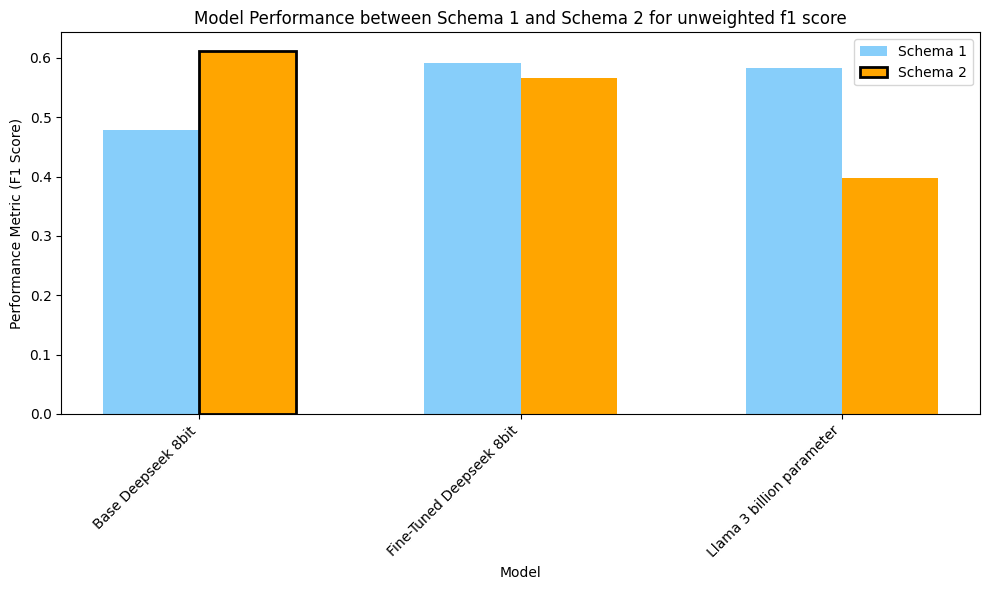

In [16]:
# Data for the models (F1 scores)
models = df_comparison['Model']
schema_1_scores = df_comparison['Schema 1']
schema_2_scores = df_comparison['Schema 2']

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
width = 0.3
x = np.arange(len(models))


# Lighten the colors for schema 1 and schema 2, keeping the highlighted orange bar darker
ax.bar(x - width/2, schema_1_scores, width, label='Schema 1', color='lightskyblue')
bars_schema_2 = ax.bar(x + width/2, schema_2_scores, width, label='Schema 2', color='orange')

# Highlight the first bar of Schema 2 (orange) with darker color
bars_schema_2[0].set_edgecolor('black')  # Highlight the leftmost bar with a black edge
bars_schema_2[0].set_linewidth(2)

# Rotate x-axis labels for better readability
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Performance Metric (F1 Score)')
ax.set_title('Model Performance between Schema 1 and Schema 2 for unweighted f1 score')

# Add legend
ax.legend()

# Display the figure
plt.tight_layout()
plt.show()

## Then, analyze the extraction performance on 1 prediction task

In [8]:
schema_1_prediction1 = schema_1df.iloc[[4]][["Base Deepseek 8bit", "Fine-Tuned Deepseek 8bit", "Llama 3 billion parameter"]]
schema_1_prediction1

,Base Deepseek 8bit,Fine-Tuned Deepseek 8bit,Llama 3 billion parameter
5,0.640238,0.679721,0.682697


In [9]:
schema_2_prediction1 = schema_2df.iloc[[4]][["Base Deepseek 8bit", "Fine-Tuned Deepseek 8bit", "Llama 3 billion parameter"]]
schema_2_prediction1

,Base Deepseek 8bit,Fine-Tuned Deepseek 8bit,Llama 3 billion parameter
4,0.720972,0.620636,0.481657


In [10]:
data = {
    "Model": schema_1_prediction1.columns,
    "Schema 1": schema_1_prediction1.iloc[0],
    "Schema 2": schema_2_prediction1.iloc[0]
}

# Create a DataFrame
df_comparison_2 = pd.DataFrame(data)

df_comparison_2

,Model,Schema 1,Schema 2
Base Deepseek 8bit,Base Deepseek 8bit,0.640238,0.720972
Fine-Tuned Deepseek 8bit,Fine-Tuned Deepseek 8bit,0.679721,0.620636
Llama 3 billion parameter,Llama 3 billion parameter,0.682697,0.481657


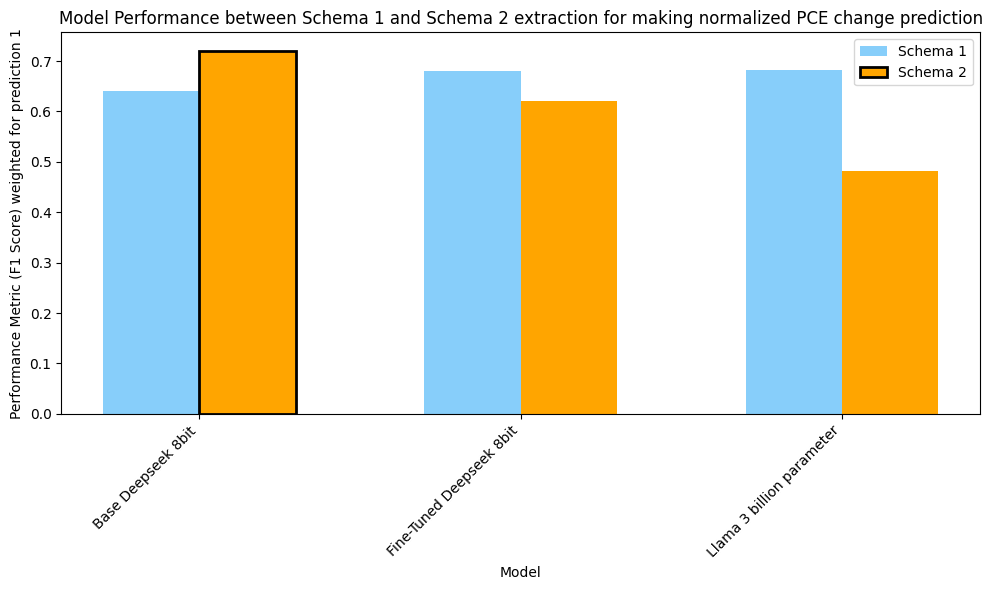

In [17]:
# Data for the models (F1 scores)
models = df_comparison_2['Model']
schema_1_scores = df_comparison_2['Schema 1']
schema_2_scores = df_comparison_2['Schema 2']

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
width = 0.3
x = np.arange(len(models))


# Lighten the colors for schema 1 and schema 2, keeping the highlighted orange bar darker
ax.bar(x - width/2, schema_1_scores, width, label='Schema 1', color='lightskyblue')
bars_schema_2 = ax.bar(x + width/2, schema_2_scores, width, label='Schema 2', color='orange')

# Highlight the first bar of Schema 2 (orange) with darker color
bars_schema_2[0].set_edgecolor('black')  # Highlight the leftmost bar with a black edge
bars_schema_2[0].set_linewidth(2)

# Rotate x-axis labels for better readability
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Performance Metric (F1 Score) weighted for prediction 1')
ax.set_title('Model Performance between Schema 1 and Schema 2 extraction for making normalized PCE change prediction')

# Add legend
ax.legend()

# Display the figure
plt.tight_layout()
plt.show()

## Then, analyze the extraction performacne on 2 prediction task

In [12]:
schema_1_prediction2 = schema_1df.iloc[[5]][["Base Deepseek 8bit", "Fine-Tuned Deepseek 8bit", "Llama 3 billion parameter"]]
schema_1_prediction2

,Base Deepseek 8bit,Fine-Tuned Deepseek 8bit,Llama 3 billion parameter
6,0.411219,0.537293,0.50786


In [13]:
schema_2_prediction2 = schema_2df.iloc[[5]][["Base Deepseek 8bit", "Fine-Tuned Deepseek 8bit", "Llama 3 billion parameter"]]
schema_2_prediction2

,Base Deepseek 8bit,Fine-Tuned Deepseek 8bit,Llama 3 billion parameter
5,0.585684,0.560775,0.400583


In [14]:
data = {
    "Model": schema_2_prediction2.columns,
    "Schema 1": schema_1_prediction2.iloc[0],
    "Schema 2": schema_2_prediction2.iloc[0]
}

# Create a DataFrame
df_comparison_3 = pd.DataFrame(data)

df_comparison_3

,Model,Schema 1,Schema 2
Base Deepseek 8bit,Base Deepseek 8bit,0.411219,0.585684
Fine-Tuned Deepseek 8bit,Fine-Tuned Deepseek 8bit,0.537293,0.560775
Llama 3 billion parameter,Llama 3 billion parameter,0.507860,0.400583


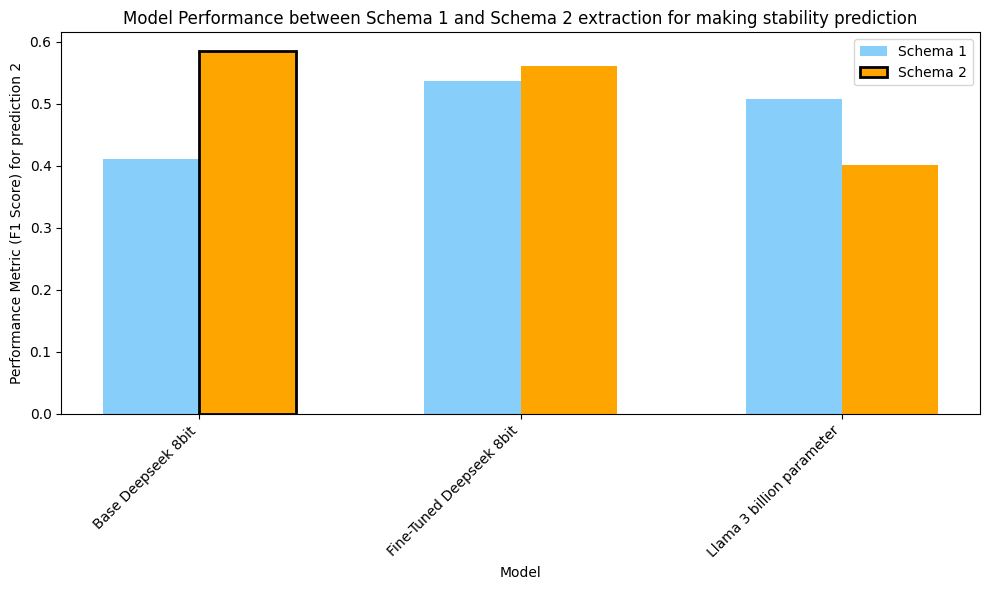

In [18]:
# Data for the models (F1 scores)
models = df_comparison_3['Model']
schema_1_scores = df_comparison_3['Schema 1']
schema_2_scores = df_comparison_3['Schema 2']

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
width = 0.3
x = np.arange(len(models))


# Lighten the colors for schema 1 and schema 2, keeping the highlighted orange bar darker
ax.bar(x - width/2, schema_1_scores, width, label='Schema 1', color='lightskyblue')
bars_schema_2 = ax.bar(x + width/2, schema_2_scores, width, label='Schema 2', color='orange')

# Highlight the first bar of Schema 2 (orange) with darker color
bars_schema_2[0].set_edgecolor('black')  # Highlight the leftmost bar with a black edge
bars_schema_2[0].set_linewidth(2)

# Rotate x-axis labels for better readability
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Performance Metric (F1 Score) for prediction 2')
ax.set_title('Model Performance between Schema 1 and Schema 2 extraction for making stability prediction')

# Add legend
ax.legend()

# Display the figure
plt.tight_layout()
plt.show()